# Further Graphics from ResultadosEjemplos.pdf

/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_48799/2292565494.py:32: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral, _ = quad(time_integrand, epsilon, a, args=(OmegaM, OmegaDE, OmegaR))
/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_48799/2292565494.py:32: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  integral, _ = quad(time_integrand, epsilon, a, args=(OmegaM, OmegaDE, OmegaR))
/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_48799/2292565494.py:32: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local diffic

Time at z=0 for Ω_m=0.3, Ω_DE=0.69, Ω_r=0.01: 13.01 Gyr
Time at z=0 for Ω_m=1.0, Ω_DE=0.0, Ω_r=0.0: 9.32 Gyr
Time at z=0 for Ω_m=0.0, Ω_DE=1.0, Ω_r=0.0: 321.86 Gyr
Time at z=0 for Ω_m=0.0, Ω_DE=0.0, Ω_r=1.0: 6.99 Gyr


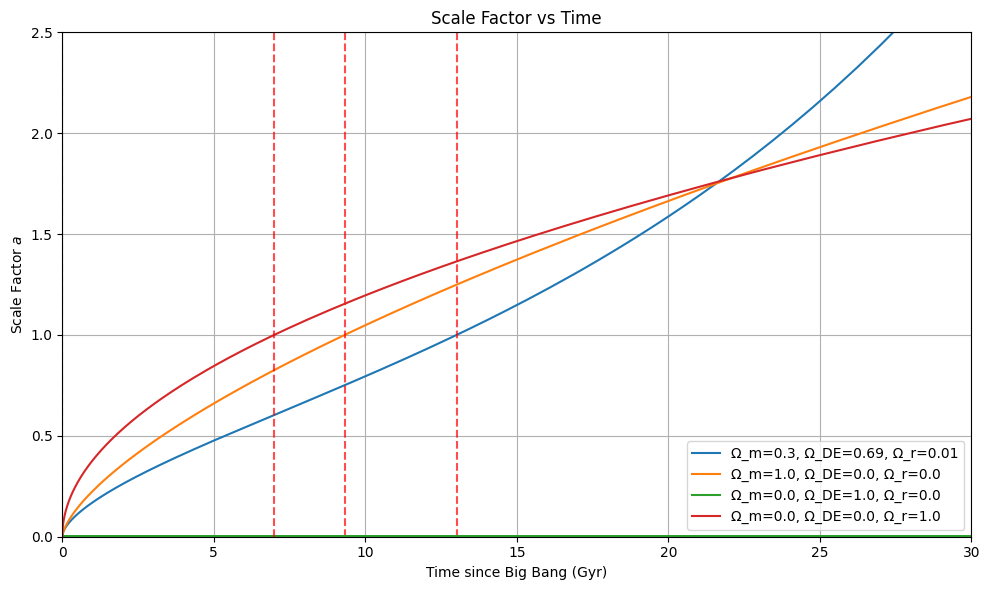

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from tqdm import tqdm

# redefine parameters
OmegaK = 0.0
parameters = [
    # OmegaM OmegaDE OmegaR
    [0.3, 0.69, 0.01],
    [1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, 1.0]
]

# Constants
H0 = 70.0  # km/s/Mpc (assuming this was defined elsewhere)
H0_SI = H0 / 3.0857e19  # Convert H0 to s⁻¹
to_gyr = 3.1536e16  # seconds per Gyr

# Redshift and corresponding scale factor
redshift = np.linspace(-1000, 1000, 100000)
a_vals = 1 / (1 + redshift)

# Time from Big Bang to given scale factor a
def cosmic_time_from_big_bang(a, OmegaM, OmegaDE, OmegaR):
    def time_integrand(a, OmegaM, OmegaDE, OmegaR):
        H_sq = OmegaM * a**-3 + OmegaDE + OmegaR * a**-4 # + OmegaK * a**-2
        # Add a small epsilon to avoid division by zero and negative values
        return 1.0 / (a * np.sqrt(np.maximum(H_sq, 1e-30)))
    
    epsilon = 1e-10
    integral, _ = quad(time_integrand, epsilon, a, args=(OmegaM, OmegaDE, OmegaR))
    return (1 / H0_SI) * integral

# Plot scale factor vs cosmic time
def plot_scale_factor_with_time(ax, time_gyr, a_vals, label):
    ax.plot(time_gyr, a_vals, label=label)
    ax.set_xlabel('Time since Big Bang (Gyr)')
    ax.set_ylabel('Scale Factor $a$')
    ax.set_title('Scale Factor vs Time')
    ax.grid(True)
    return ax

# Create single figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Labels for each parameter set
labels = [
    'Ω_m=0.3, Ω_DE=0.69, Ω_r=0.01',
    'Ω_m=1.0, Ω_DE=0.0, Ω_r=0.0',
    'Ω_m=0.0, Ω_DE=1.0, Ω_r=0.0',
    'Ω_m=0.0, Ω_DE=0.0, Ω_r=1.0'
]

for i, pset in enumerate(tqdm(parameters)):
    Om, Ode, Or = pset
    
    # Generate time values (one per scale factor)
    time_gyr = np.array([cosmic_time_from_big_bang(ai, Om, Ode, Or) for ai in a_vals]) / to_gyr  # Gyr
    
    plot_scale_factor_with_time(ax, time_gyr, a_vals, labels[i])
    
    # add line for z = 0
    a_0 = 1.0
    t_0 = cosmic_time_from_big_bang(a_0, Om, Ode, Or) / to_gyr  # Gyr
    print(f"Time at z=0 for {labels[i]}: {t_0:.2f} Gyr")
    ax.axvline(x=t_0, color='r', linestyle='--', alpha=0.7)

# Set limits and add legend after all plots are done
ax.set_xlim(0, 30)
ax.set_ylim(0, 2.5)
ax.legend()

# Add a single z=0 label to legend (instead of multiple)
ax.axvline(x=0, color='r', linestyle='--', alpha=0.7, label='z = 0')

fig.tight_layout()
plt.show()
plt.close()